<a href="https://colab.research.google.com/github/VictorDu1990/Keras_TensorFlow_DL_demo/blob/master/keras_MLP_mnist_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#一、数据预处理
#01.导入所需模块
from keras.utils import np_utils
import numpy as np
from keras.datasets import mnist
#02.读取mnist数据
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()
#03.数据预处理
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255
print(y_test_label.shape)
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)
print(y_Test_OneHot.shape)

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
(10000,)
(10000, 10)


In [3]:
#二、建立模型
#01.导入所需模块
from keras.models import Sequential
from keras.layers import Dense
#02.建立sequential 模型
model = Sequential()
#03.建立网络层（输入层，隐藏层，输出层）
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [4]:
#三、进行训练
#01.定义训练方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#02.开始训练
train_history = model.fit(x=x_Train_normalize, y=y_Train_OneHot, validation_split=0.2, epochs=10, batch_size=200, verbose=2)



Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.4412 - acc: 0.8817 - val_loss: 0.2175 - val_acc: 0.9403
Epoch 2/10
 - 2s - loss: 0.1879 - acc: 0.9464 - val_loss: 0.1561 - val_acc: 0.9555
Epoch 3/10
 - 2s - loss: 0.1327 - acc: 0.9619 - val_loss: 0.1299 - val_acc: 0.9633
Epoch 4/10
 - 2s - loss: 0.1007 - acc: 0.9715 - val_loss: 0.1095 - val_acc: 0.9676
Epoch 5/10
 - 2s - loss: 0.0806 - acc: 0.9774 - val_loss: 0.1005 - val_acc: 0.9698
Epoch 6/10
 - 2s - loss: 0.0655 - acc: 0.9821 - val_loss: 0.0949 - val_acc: 0.9712
Epoch 7/10
 - 2s - loss: 0.0540 - acc: 0.9856 - val_loss: 0.0878 - val_acc: 0.9731
Epoch 8/10
 - 2s - loss: 0.0447 - acc: 0.9878 - val_loss: 0.0902 - val_acc: 0.9730
Epoch 9/10
 - 2s - loss: 0.0372 - acc: 0.9906 - val_loss: 0.0855 - val_acc: 0.9743
Epoch 10/10
 - 2s - loss: 0.0320 - acc: 0.9921 - val_loss: 0.0867 - val_acc: 0.9748


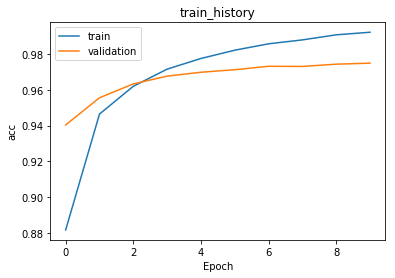

In [5]:
#03.显示训练过程
%matplotlib inline
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('train_history')
  plt.ylabel(train)
  plt.xlabel('Epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

show_train_history(train_history, 'acc', 'val_acc')

In [6]:
#四、模型评估及进行预测
#01.评估模型准确率
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy: ', scores[1])
#02.执行预测
prediction = model.predict_classes(x_Test)
#03.显示混淆矩阵
import pandas as pd
pd.crosstab(y_test_label, prediction, rownames=['label'], colnames=['predict'])

10000/10000 [==============================] - 0s 36us/step

accuracy:  0.9756


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,2,2,2,0,1,1,1,0
1,0,1126,4,0,0,0,1,0,4,0
2,7,3,1008,0,2,0,4,4,4,0
3,2,0,8,989,0,1,2,2,5,1
4,1,1,2,0,962,0,5,1,1,9
5,4,0,0,18,1,848,8,1,8,4
6,4,3,5,1,3,3,938,0,1,0
7,1,7,13,2,0,0,0,996,1,8
8,7,1,9,6,4,2,2,2,940,1


In [7]:
#五、模型优化
#01.隐藏层神经元增加到1000,加入DropOut层
from keras.models import Sequential
from keras.layers import Dense, Dropout
model_2 = Sequential()
model_2.add(Dense(units=1000, input_dim=784, kernel_initializer='normal', activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))
print(model_2.summary())

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
#02.定义训练方式
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#03.开始训练
train_history = model_2.fit(x=x_Train_normalize, y=y_Train_OneHot, validation_split=0.2, epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 7s - loss: 0.3559 - acc: 0.8926 - val_loss: 0.1591 - val_acc: 0.9548
Epoch 2/10
 - 7s - loss: 0.1582 - acc: 0.9532 - val_loss: 0.1143 - val_acc: 0.9664
Epoch 3/10
 - 7s - loss: 0.1178 - acc: 0.9650 - val_loss: 0.0978 - val_acc: 0.9709
Epoch 4/10
 - 7s - loss: 0.0904 - acc: 0.9727 - val_loss: 0.0872 - val_acc: 0.9743
Epoch 5/10
 - 7s - loss: 0.0760 - acc: 0.9769 - val_loss: 0.0834 - val_acc: 0.9751
Epoch 6/10
 - 7s - loss: 0.0643 - acc: 0.9806 - val_loss: 0.0737 - val_acc: 0.9774
Epoch 7/10
 - 7s - loss: 0.0559 - acc: 0.9830 - val_loss: 0.0701 - val_acc: 0.9787
Epoch 8/10
 - 7s - loss: 0.0469 - acc: 0.9854 - val_loss: 0.0692 - val_acc: 0.9784
Epoch 9/10
 - 7s - loss: 0.0427 - acc: 0.9866 - val_loss: 0.0678 - val_acc: 0.9804
Epoch 10/10
 - 7s - loss: 0.0355 - acc: 0.9889 - val_loss: 0.0685 - val_acc: 0.9792
